# Linear Regression

## Load Dataset from sklearn

In [1]:
!pip install matplotlib seaborn pandas sklearn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["TARGET"] = housing.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


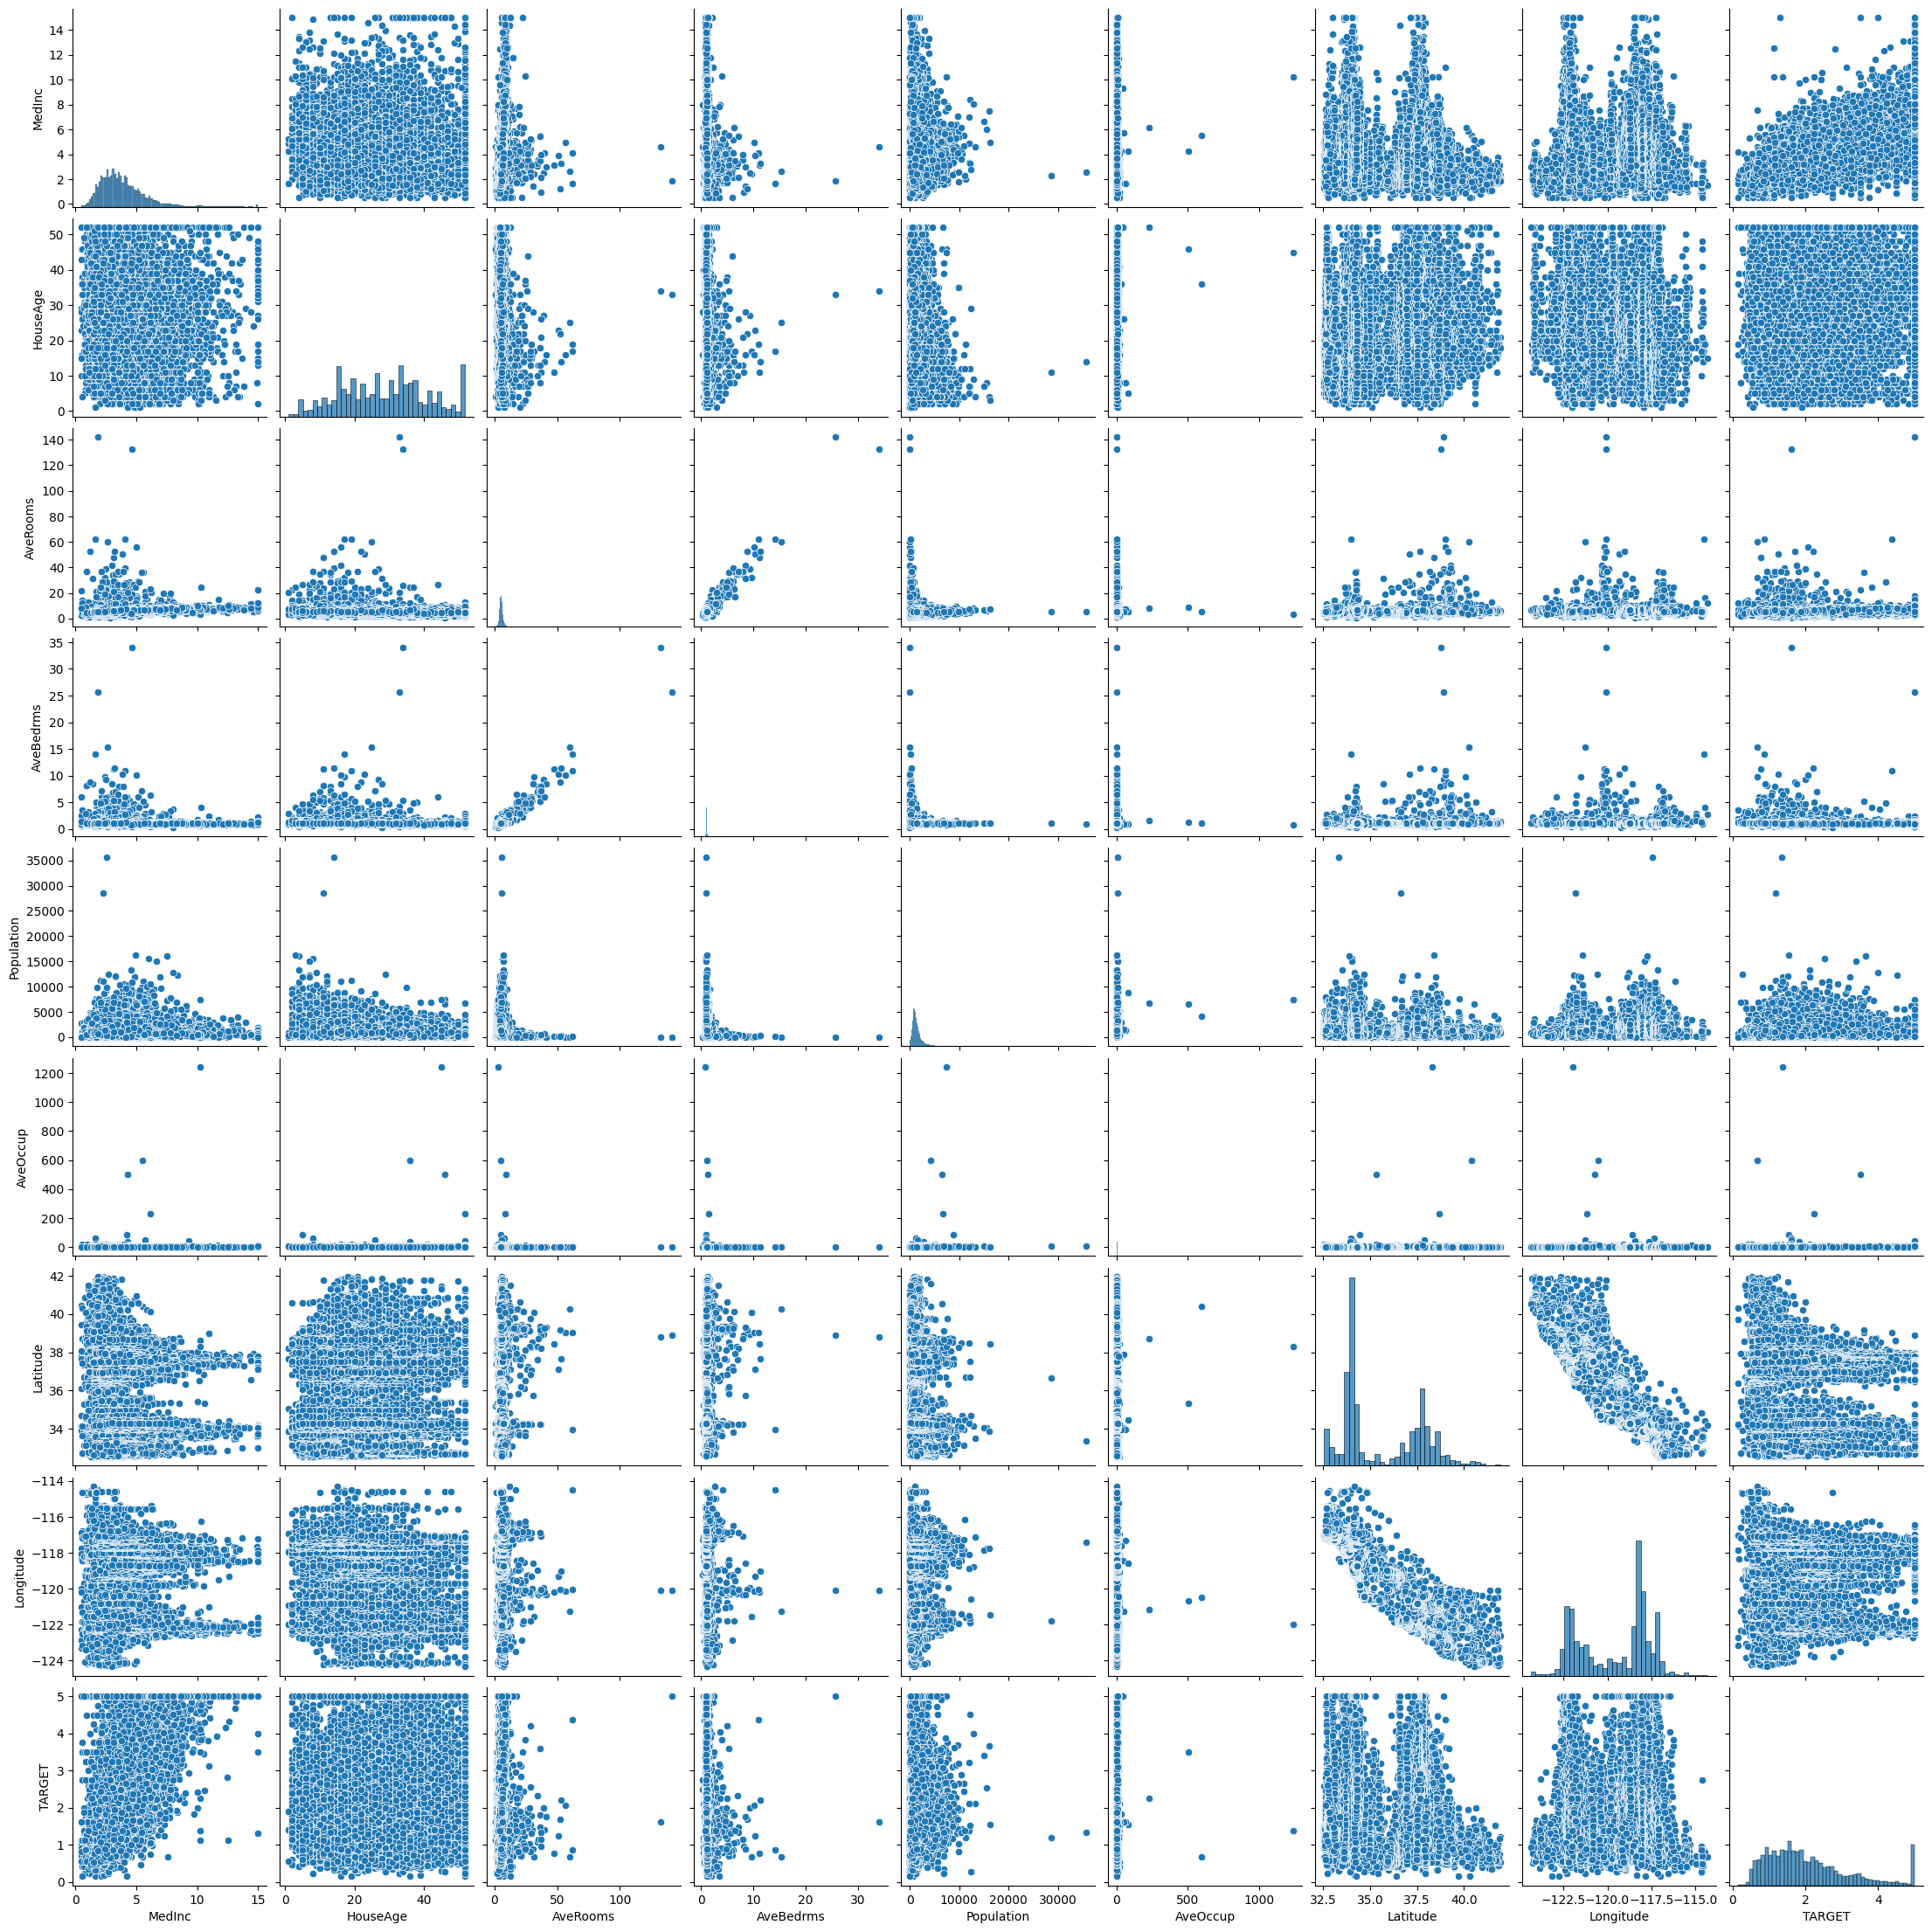

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
cols = ["TARGET", "MedInc", "HouseAge", "AveRooms"]

In [7]:
df[cols].describe()

,TARGET,MedInc,HouseAge,AveRooms
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000
std,1.153956,1.899822,12.585558,2.474173
min,0.149990,0.499900,1.000000,0.846154
25%,1.196000,2.563400,18.000000,4.440716
50%,1.797000,3.534800,29.000000,5.229129
75%,2.647250,4.743250,37.000000,6.052381
max,5.000010,15.000100,52.000000,141.909091


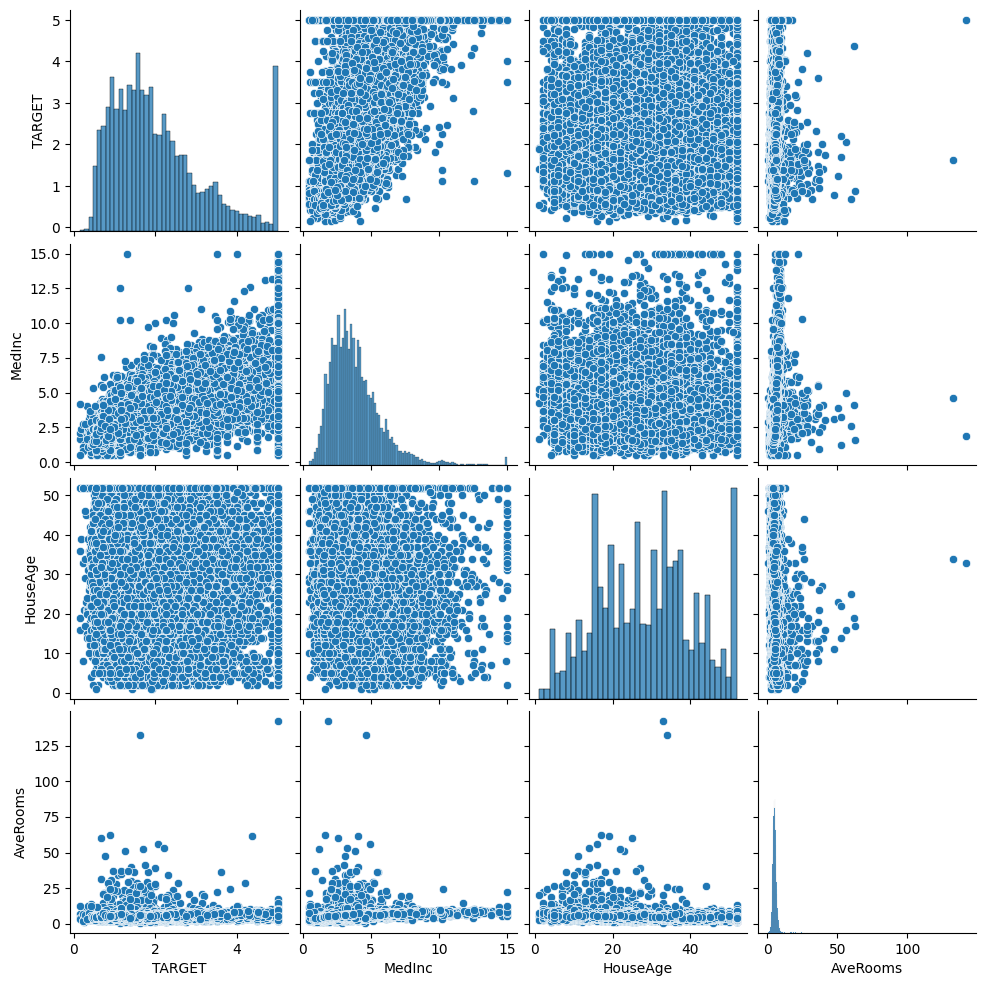

In [8]:
sns.pairplot(df[cols])
plt.show()

## Train Linear Model with PyTorch

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([20640, 4])

In [11]:
# Split x and y.
y = data[:, :1]
x = data[:, 1:]

print(x.shape, y.shape)

torch.Size([20640, 3]) torch.Size([20640, 1])


In [12]:
# Define configurations.
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [13]:
# Define model.
model = nn.Linear(x.size(-1), y.size(-1))

model

Linear(in_features=3, out_features=1, bias=True)

In [14]:
# Whole training samples are used in 1 epoch.
# Thus, "N epochs" means that model saw a sample N-times.
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 100: loss=3.9438e+04
Epoch 200: loss=1.5476e+07
Epoch 300: loss=6.0731e+09
Epoch 400: loss=2.3832e+12
Epoch 500: loss=9.3524e+14
Epoch 600: loss=3.6701e+17
Epoch 700: loss=1.4403e+20
Epoch 800: loss=5.6520e+22
Epoch 900: loss=2.2180e+25
Epoch 1000: loss=8.7041e+27
Epoch 1100: loss=3.4158e+30
Epoch 1200: loss=1.3404e+33
Epoch 1300: loss=inf
Epoch 1400: loss=inf
Epoch 1500: loss=inf
Epoch 1600: loss=inf
Epoch 1700: loss=inf
Epoch 1800: loss=inf
Epoch 1900: loss=inf
Epoch 2000: loss=inf


## Let's see the Result!

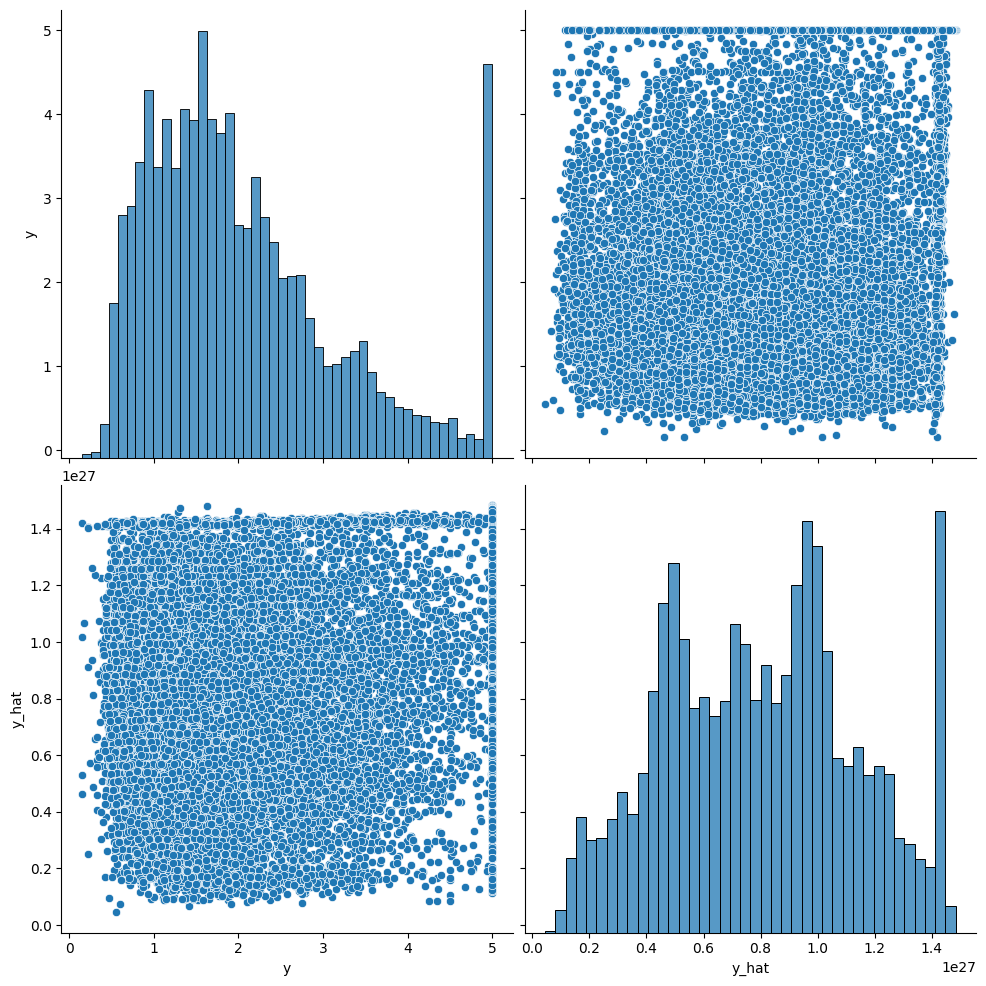

In [15]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()